# Activity 1

In [1]:
import pandas as pd

In [19]:
df = pd.read_excel(r'C:\Users\LENOVO\Documents\Masterarbeit\crm.xlsx')

C:\Users\LENOVO\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [20]:
import re
#remove whitespaces
df['Processed_Phone_Number'] = df['Phone_number'].str.replace(' ', '', regex=False)
#remove the 0, if the number starts with it
df['Processed_Phone_Number'] = df['Processed_Phone_Number'].str.lstrip('0')
def is_valid_number(phone):
  
    if re.match(r'^8\d{8}$', phone) or re.match(r'^418\d{8}$', phone):
        return True
    else:
        return False

def reformat_number(phone):
    if phone.startswith('418'):
        return phone[2:]
    else:
        return phone

df['Processed_Phone_Number'] = df['Processed_Phone_Number'].apply(lambda x: reformat_number(str(x)) if is_valid_number(str(x)) else 'Invalid')
df['Invalid_Flag'] = df['Processed_Phone_Number'].apply(lambda x: 'Invalid' if not is_valid_number(str(x)) else '')


In [21]:
df.head(60)

,Consumer ID,Phone_number,days since registration,Emails received,Emails opened,Emails clicked,Number_orders,Order_value,Percent_orders_with_promo,Segment,Processed_Phone_Number,Invalid_Flag
0,xd81x9a5143049x,813114341,324,27,19,5,0,0.0,?,H,813114341,
1,dd7dda4124852x1,835810414,143,22,13,1,0,0.0,?,H,835810414,
2,7fa385x3x44dfx8,8343311381,443,36,2,2,0,0.0,?,H,Invalid,Invalid
3,6fad8d5074caa98,815141383,73,16,16,0,0,0.0,?,H,815141383,
4,0af7c3a764e9a86,814411533,262,24,18,1,0,0.0,?,H,814411533,
5,9419aa9f640c2ax,8354400441,85,22,22,0,0,0.0,?,H,Invalid,Invalid
6,837f300104181ax,813314133,238,20,19,0,0,0.0,?,H,813314133,
7,ae2dea32d4eecax,813135184,1880,82,65,11,0,0.0,?,H,813135184,
8,9273ce0ee415ax8,814534840,159,19,2,0,0,0.0,?,A,814534840,
9,50aa03dcc4674a3,815445588,304,28,11,1,0,0.0,?,H,815445588,


In [22]:
df.to_excel(r'C:\Users\LENOVO\Documents\Masterarbeit\Processed_Data-CaseStudy-CRMDataIntern.xlsx', index=False)

# Activity 2

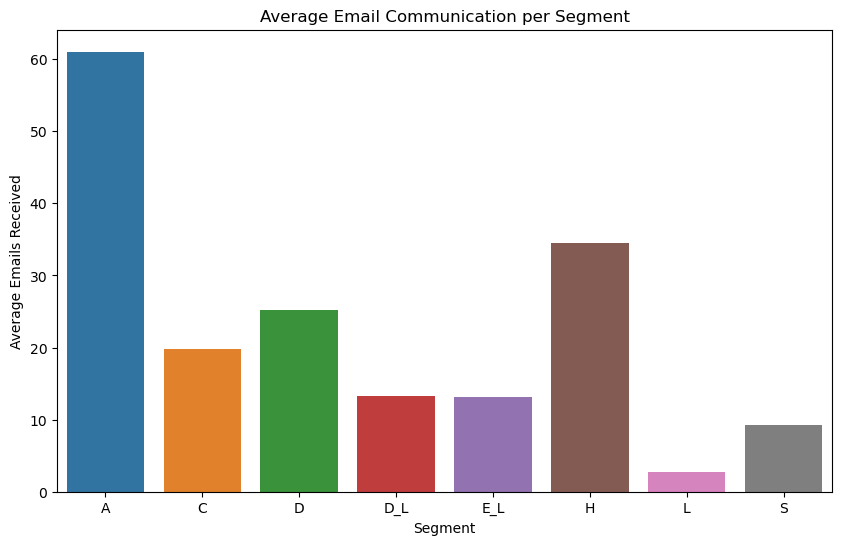

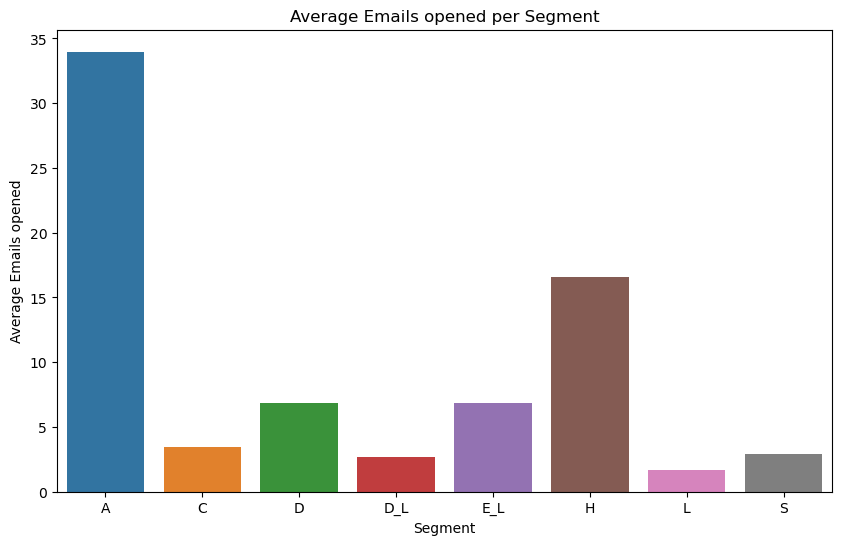

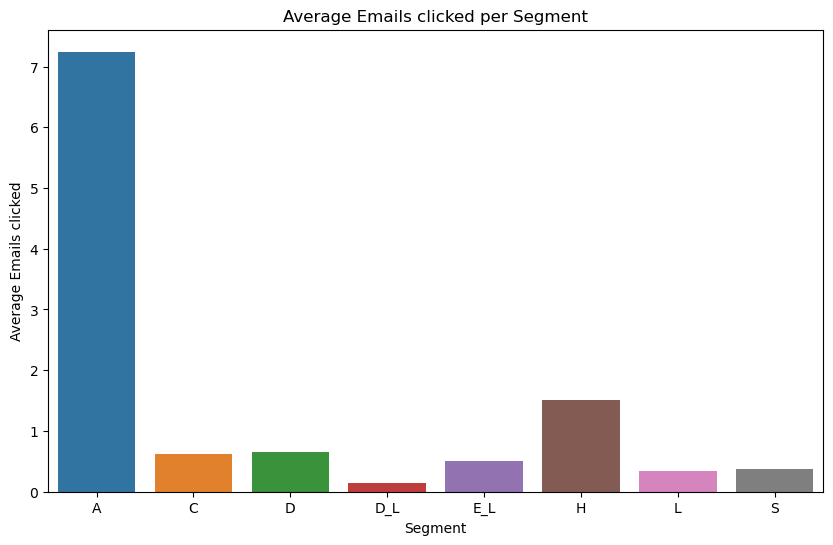

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
avg_email_freq = df.groupby('Segment')['Emails received'].mean()
avg_open_rate = df.groupby('Segment')['Emails opened'].mean()
avg_click_through_rate = df.groupby('Segment')['Emails clicked'].mean()


plt.figure(figsize=(10, 6))
sns.barplot(x=avg_email_freq.index, y=avg_email_freq.values)
plt.title('Average Email Communication per Segment')
plt.xlabel('Segment')
plt.ylabel('Average Emails Received')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_open_rate.index, y=avg_open_rate.values)
plt.title('Average Emails opened per Segment')
plt.xlabel('Segment')
plt.ylabel('Average Emails opened')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_click_through_rate.index, y=avg_click_through_rate.values)
plt.title('Average Emails clicked per Segment')
plt.xlabel('Segment')
plt.ylabel('Average Emails clicked')
plt.show()

# Activity 3

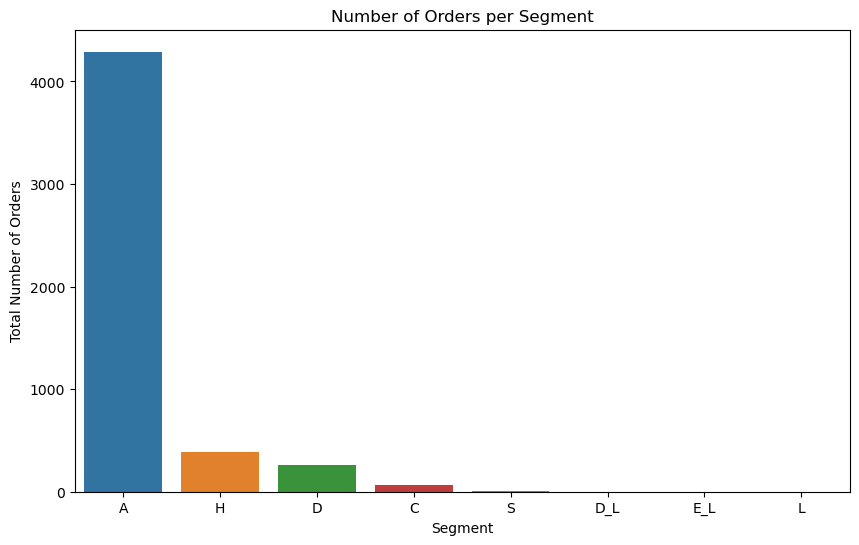

In [34]:
orders_per_segment = df.groupby('Segment')['Number_orders'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=orders_per_segment.index, y=orders_per_segment.values)
plt.title('Number of Orders per Segment')
plt.xlabel('Segment')
plt.ylabel('Total Number of Orders')
plt.show()

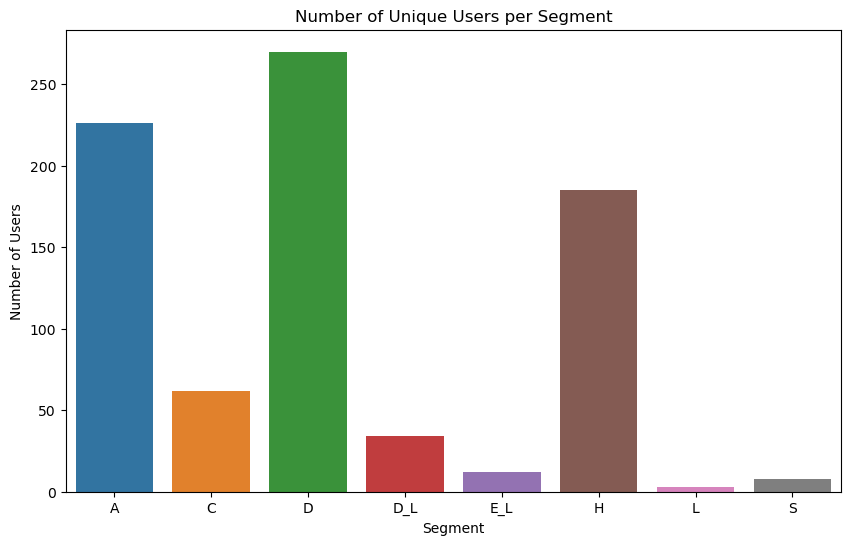

In [8]:
segment_user_count = df.groupby('Segment')['Consumer ID'].nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_user_count.index, y=segment_user_count.values)
plt.title('Number of Unique Users per Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Users')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14284\2842668139.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Segment', y='Average_Order_Value', ci=None)


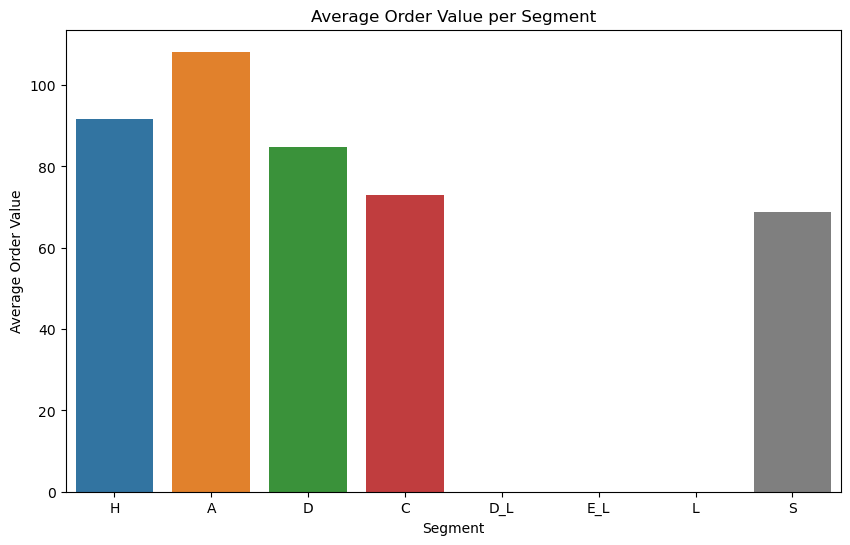

In [36]:
df['Average_Order_Value'] = df['Order_value'] / df['Number_orders']
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Segment', y='Average_Order_Value', ci=None)
plt.title('Average Order Value per Segment')
plt.xlabel('Segment')
plt.ylabel('Average Order Value')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14284\759662245.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=promo_code_usage_per_segment, x='Segment', y='Promo_Code_Used', ci=None)


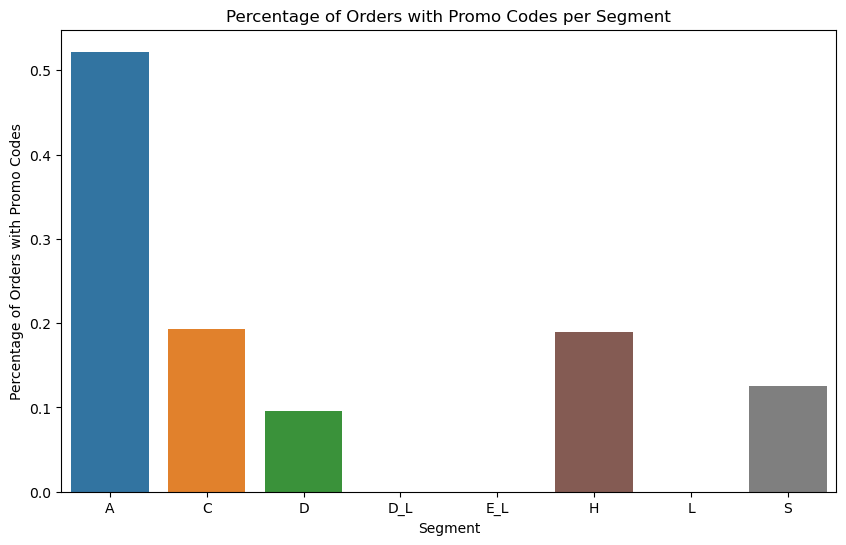

In [37]:
df['Percent_orders_with_promo'] = df['Percent_orders_with_promo'].replace('?', '0%')
df['Percent_orders_with_promo'] = df['Percent_orders_with_promo'].str.rstrip('%').astype('float') / 100

df['Promo_Code_Used'] = df['Percent_orders_with_promo'].apply(lambda x: 1 if x > 0 else 0)
promo_code_usage_per_segment = df.groupby('Segment')['Promo_Code_Used'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=promo_code_usage_per_segment, x='Segment', y='Promo_Code_Used', ci=None)
plt.title('Percentage of Orders with Promo Codes per Segment')
plt.xlabel('Segment')
plt.ylabel('Percentage of Orders with Promo Codes')
plt.show()

<Figure size 1200x800 with 0 Axes>

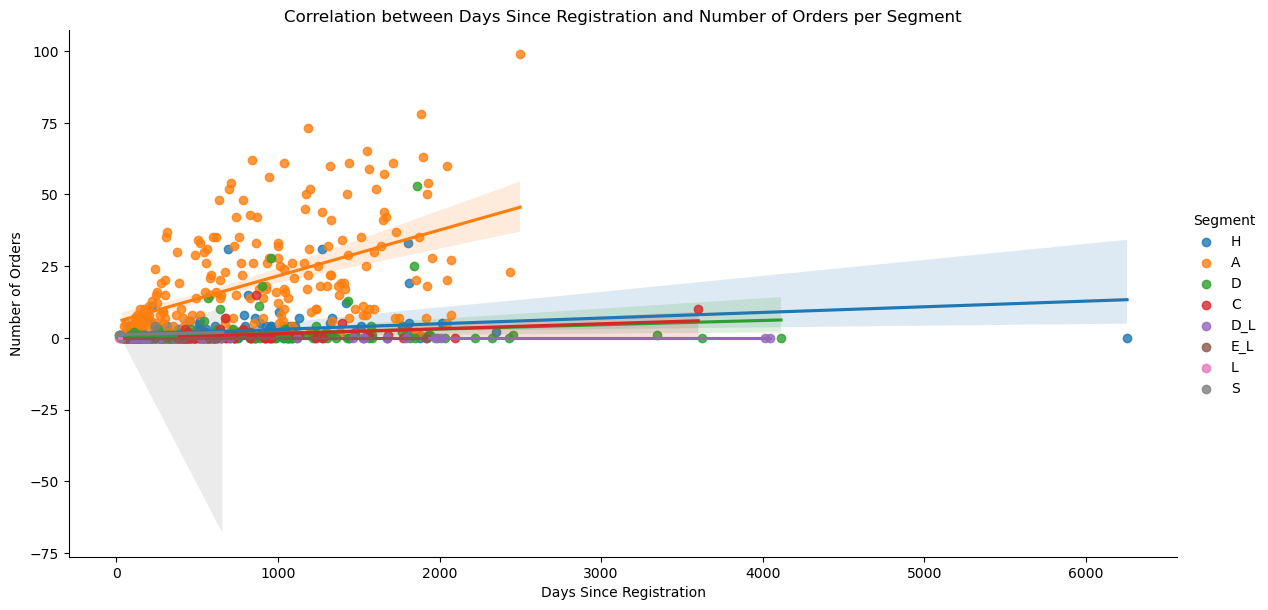

In [38]:
plt.figure(figsize=(12, 8))

sns.lmplot(data=df, x='days since registration', y='Number_orders', hue='Segment', height=6, aspect=2)
plt.title('Correlation between Days Since Registration and Number of Orders per Segment')
plt.xlabel('Days Since Registration')
plt.ylabel('Number of Orders')

plt.show()

<Figure size 1200x800 with 0 Axes>

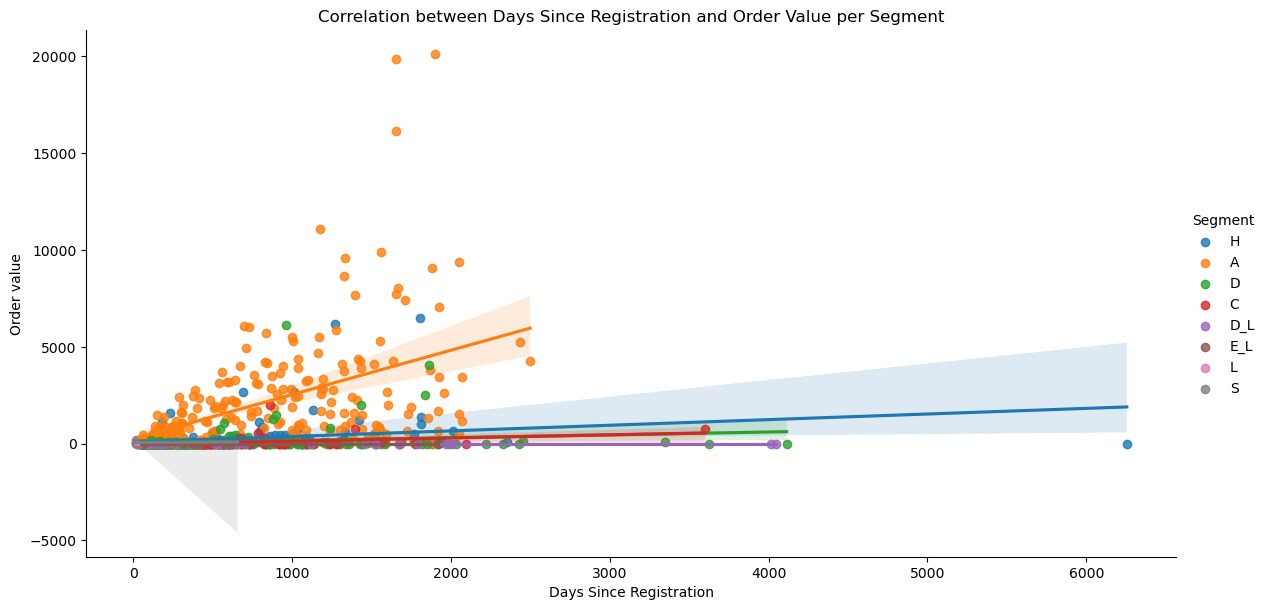

In [54]:
plt.figure(figsize=(12, 8))

sns.lmplot(data=df, x='days since registration', y='Order_value', hue='Segment', height=6, aspect=2)
plt.title('Correlation between Days Since Registration and Order Value per Segment')
plt.xlabel('Days Since Registration')
plt.ylabel('Order value')

plt.show()

<Figure size 1200x600 with 0 Axes>

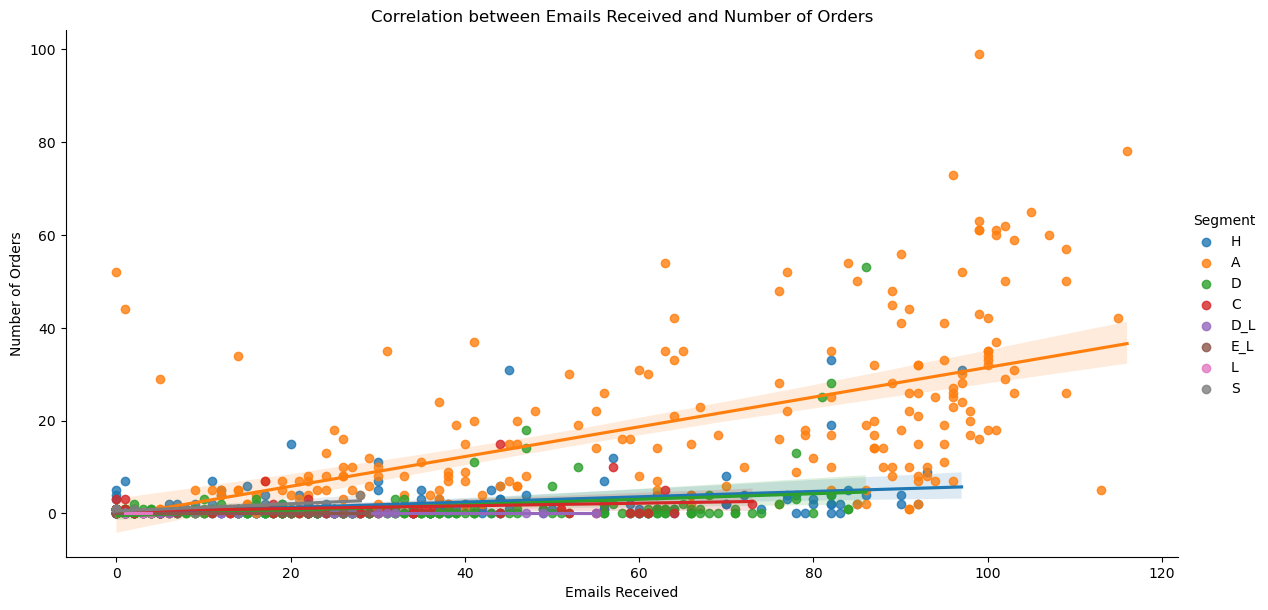

In [44]:
plt.figure(figsize=(12, 6))
sns.lmplot(data=df, x='Emails received', y='Number_orders', hue='Segment', height=6, aspect=2)
plt.title('Correlation between Emails Received and Number of Orders')
plt.xlabel('Emails Received')
plt.ylabel('Number of Orders')
plt.show()

<Figure size 1200x600 with 0 Axes>

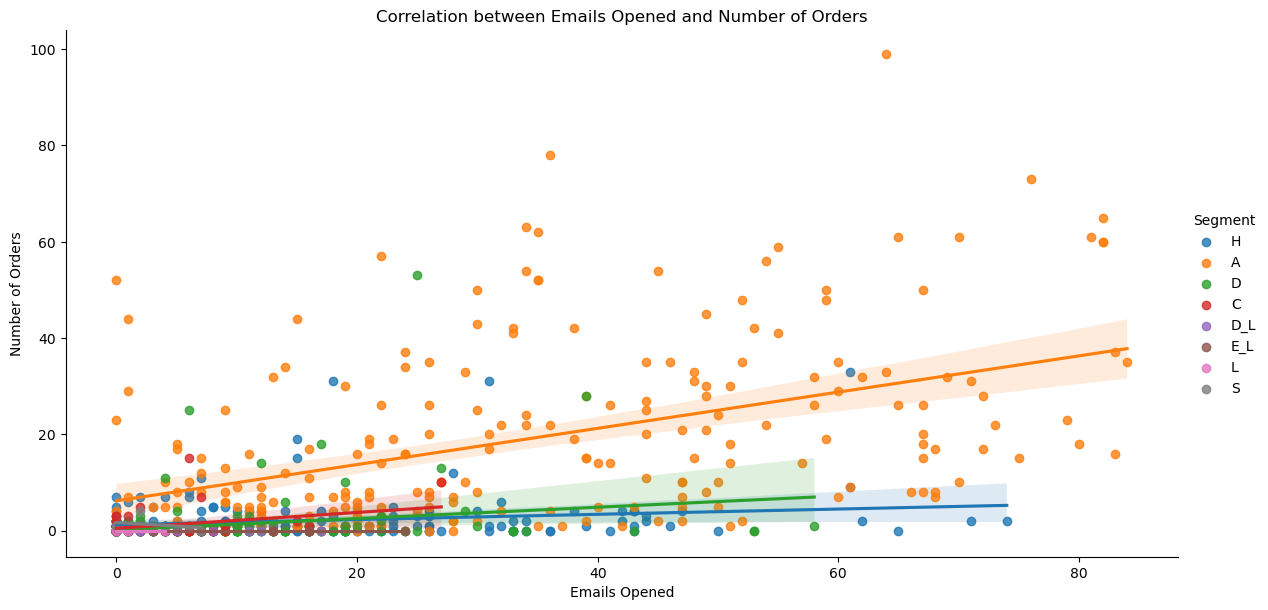

In [45]:
plt.figure(figsize=(12, 6))
sns.lmplot(data=df, x='Emails opened', y='Number_orders', hue='Segment', height=6, aspect=2)
plt.title('Correlation between Emails Opened and Number of Orders')
plt.xlabel('Emails Opened')
plt.ylabel('Number of Orders')
plt.show()

<Figure size 1200x600 with 0 Axes>

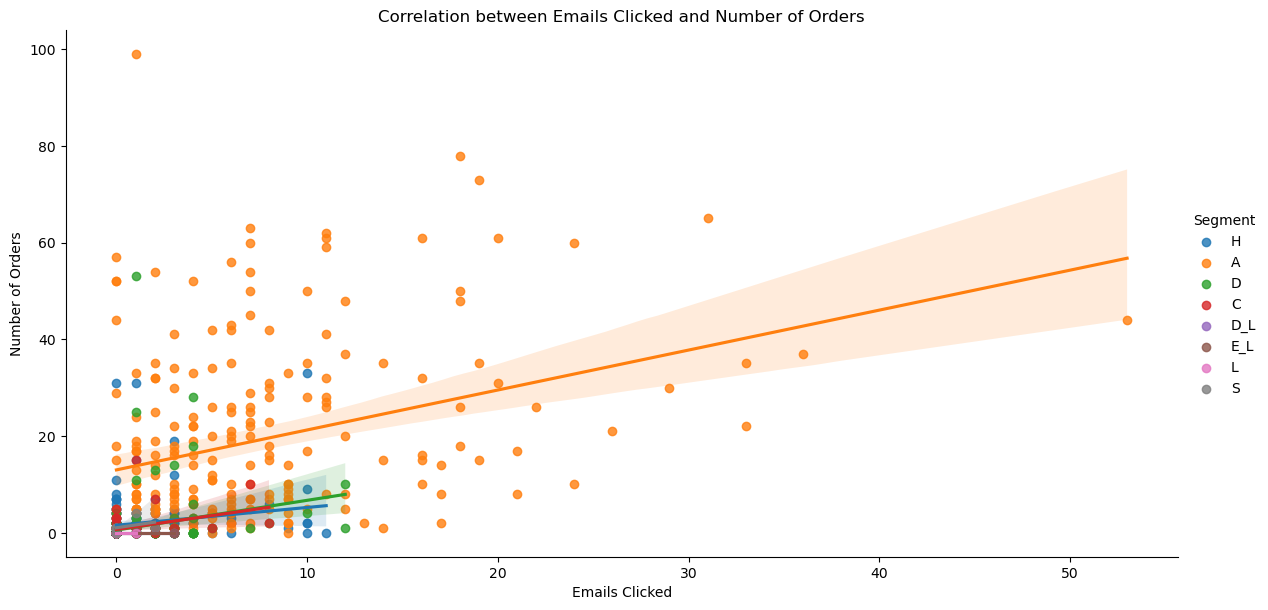

In [46]:
plt.figure(figsize=(12, 6))
sns.lmplot(data=df, x='Emails clicked', y='Number_orders', hue='Segment', height=6, aspect=2)
plt.title('Correlation between Emails Clicked and Number of Orders')
plt.xlabel('Emails Clicked')
plt.ylabel('Number of Orders')
plt.show()

<Figure size 1200x600 with 0 Axes>

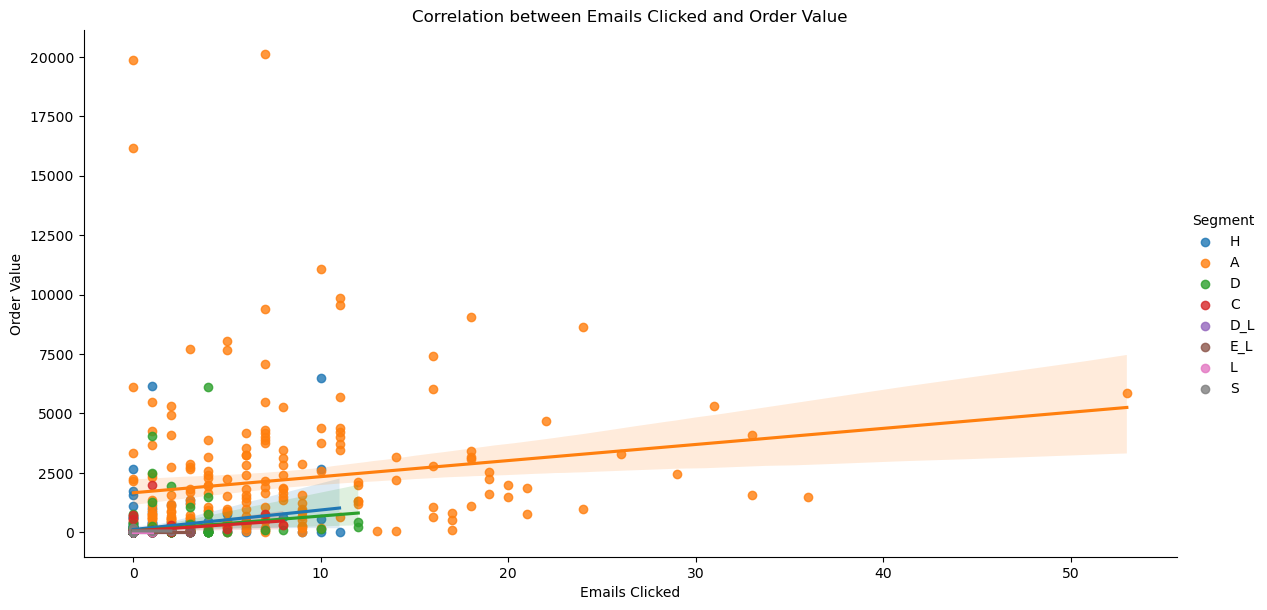

In [48]:
plt.figure(figsize=(12, 6))
sns.lmplot(data=df, x='Emails clicked', y='Order_value', hue='Segment', height=6, aspect=2)
plt.title('Correlation between Emails Clicked and Order Value')
plt.xlabel('Emails Clicked')
plt.ylabel('Order Value')
plt.show()